In [26]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

First 5 rows of the dataset:


,X,Y
0,-0.752759,-3.729208
1,2.704286,11.614913
2,1.391964,-0.464834
3,0.591951,-0.464642
4,-2.063888,-49.508220



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       50 non-null     float64
 1   Y       50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes

Missing Values:
X    0
Y    0
dtype: int64

Statistical Summary:


,X,Y
count,50.000000,50.000000
mean,-0.324457,-19.078880
std,1.733299,29.664932
min,-2.876493,-96.629715
25%,-1.897398,-34.742488
50%,-0.383707,-4.587188
75%,0.899130,1.274569
max,2.819459,15.578434



Pairwise Relationships:


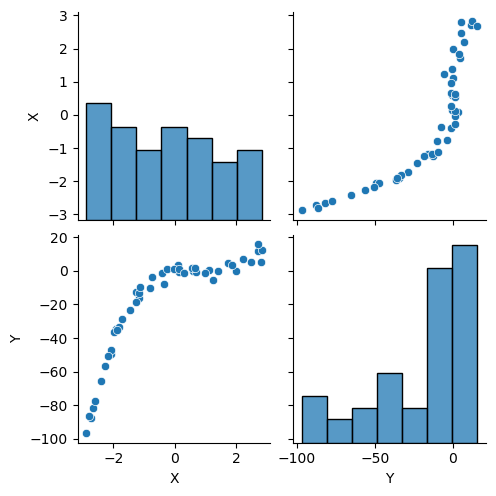


Correlation Matrix:


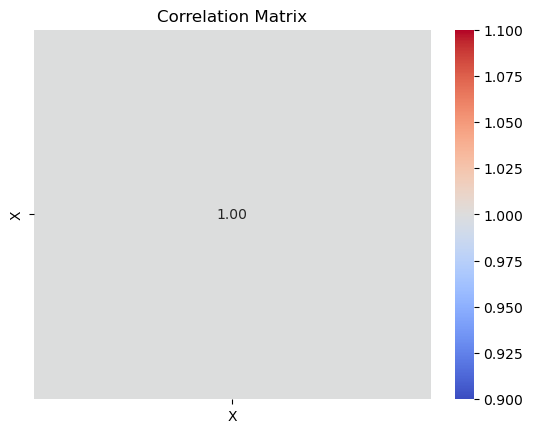

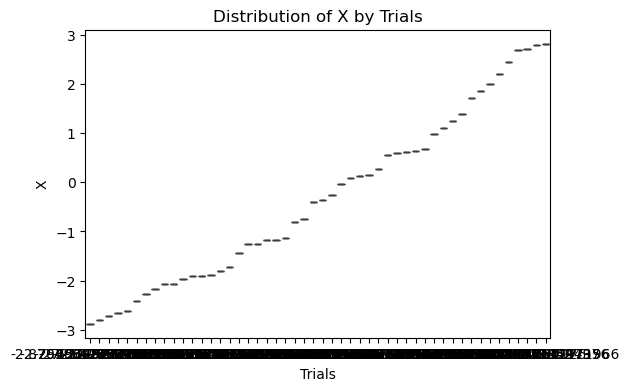

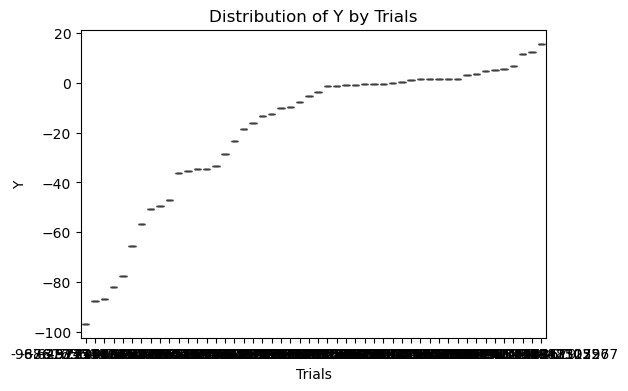

In [28]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dt = pd.read_csv('polynomial_regression_dataset.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(dt.head())

# Basic information about the dataset
print("\nDataset Info:")
dt.info()

# Check for missing values
print("\nMissing Values:")
print(dt.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary:")
display(dt.describe())

# Count the number of samples for each species
#print("\nSpecies Count:")
#print(pca['species'].value_counts())

# Pairplot to visualize pairwise relationships between features
print("\nPairwise Relationships:")
sns.pairplot(dt)#, hue='species', diag_kind='kde')
plt.show()

# Correlation matrix and heatmap
print("\nCorrelation Matrix:")
correlation_matrix = dt.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for feature distribution by species
features = dt#.columns[:-1]  # Exclude the species column
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y=feature, data=dt)
    plt.title(f'Distribution of {feature} by Trials')
    plt.xlabel('Trials')
    plt.ylabel(feature)
    plt.show()

Mean Squared Error: 175.80773944330346
Mean Absolute Error: 11.345297168637389
R^2 Score: 0.6931559630472418
The linear regression model does not fit well. Visually the data is in a parabolic state, while the regression model is in a linear state. Thus us why the linear regression model does not fit the data well.


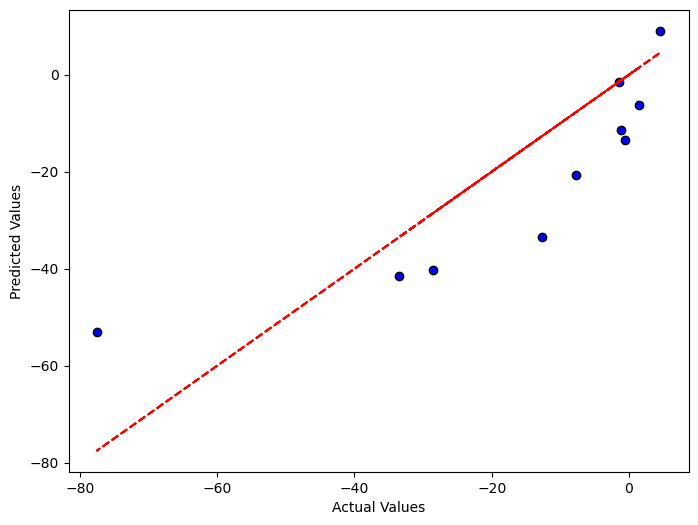

In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge  # Added Ridge regression import

# Load dataset
file_path = 'polynomial_regression_dataset.csv'  
df = pd.read_csv(file_path)

# Define independent and dependent variables
X = df.iloc[:, :-1]  # All columns except the last as features
y = df.iloc[:, -1]   # Last column as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

print("The linear regression model does not fit well. Visually the data is in a parabolic state, while the regression model is in a linear state. Thus us why the linear regression model does not fit the data well.")

Mean Squared Error: 7.466528921664313
R^2 Score: 0.9869683787323433


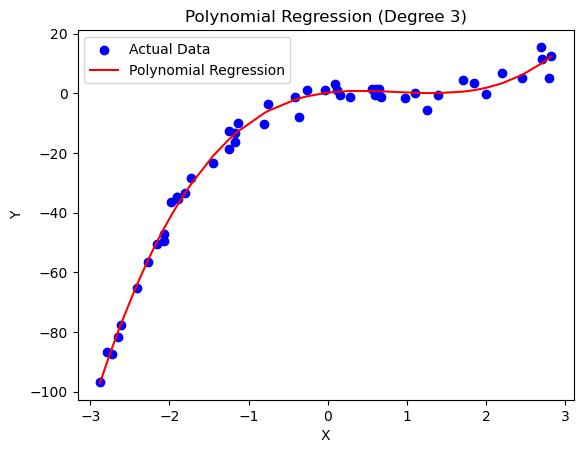

Coefficients: [[ 0.          3.21092982 -5.07507188  1.93750175]]
Intercept: [0.24063817]


In [30]:

# Load the CSV file
drp = pd.read_csv('polynomial_regression_dataset.csv')  # Replace with your CSV file name

# Assuming the CSV has two columns: 'X' and 'Y'
X = drp[['X']].values  # Independent variable (reshape if needed)
Y = drp[['Y']].values  # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Transform features into polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a linear regression model to the transformed features
model = LinearRegression()
model.fit(X_poly_train, Y_train)

# Predict on test set
Y_pred = model.predict(X_poly_test)

# Compute Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualizing the polynomial regression results
plt.scatter(X, Y, color='blue', label='Actual Data')
sorted_X = np.sort(X, axis=0)
sorted_X_poly = poly.transform(sorted_X)
plt.plot(sorted_X, model.predict(sorted_X_poly), color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression (Degree 3)')
plt.show()

# Print model coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


In [32]:
print("The polynomial regression model greatly increases the r^2 socre and greatly reduces the MSE score. This mean that the polynomial regression model better fits the data.")

The polynomial regression model greatly increases the r^2 socre and greatly reduces the MSE score. This mean that the polynomial regression model better fits the data.
